In [ ]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
url = "https://raw.githubusercontent.com/buzzCraft/Dave3625-21-Lab/main/Lab2/data/Titanic.csv"
df = pd.read_csv(url, sep=',')

df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
#Fill missing values - for this lab, lets just use teh median() function
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [ ]:
#Add a new column for HasCabin
# ~ invert the bool value, so that no cabin = False
df['HasCabin'] = ~df.Cabin.isnull()
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [ ]:
#Lets add a new column called Title
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

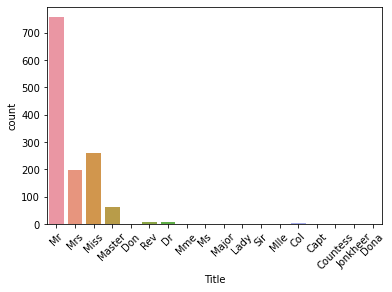

In [ ]:
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

In [ ]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Countess      1
Jonkheer      1
Sir           1
Capt          1
Lady          1
Mme           1
Don           1
Name: Title, dtype: int64

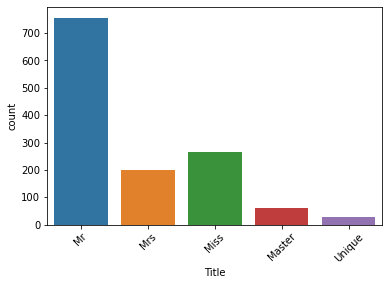

In [ ]:
# Grouping titles to
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Unique')
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

Prepearing for binary data conversion

In [ ]:

# Creating numerical columns for age and fare
df['CatAge'] = pd.qcut(df.Age, q=4, labels=False )
df['CatFare']= pd.qcut(df.Fare, q=4, labels=False)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [ ]:
#Dropping columns that wont make sence in binary
df = df.drop(["Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,male,1,0,S,False,Mr,0,0
1,2,1,female,1,0,C,True,Mrs,3,3
2,3,3,female,0,0,S,False,Miss,1,1
3,4,1,female,1,0,S,True,Mrs,2,3
4,5,3,male,0,0,S,False,Mr,2,1


In [ ]:
# Converting to binary values
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()



,PassengerId,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,1,0,False,0,0,1,0,1,0,1,0,0
1,2,1,1,0,True,3,3,0,0,0,0,0,1,0
2,3,3,0,0,False,1,1,0,0,1,1,0,0,0
3,4,1,1,0,True,2,3,0,0,1,0,0,1,0
4,5,3,0,0,False,2,1,1,0,1,0,1,0,0
